## Final Project Submission

Please fill out:
* Student name:Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name:Claude Fried 
* Blog post URL:https://github.com/maysasaad/Phase_1_Project


# Box Office Revinues

![2222.png](images/2222.png)

## Overview

This project involves the examination of essential data required by Microsoft for establishing a film studio and generating successful box office movies. It includes a detailed analysis of movies that have achieved significant box office revenues. The resulting data offers three valuable recommendations that Microsoft can utilize to make informed decisions on producing prosperous movies.

## Business Problem

Microsoft has made a decision to create its own movie studio with a focus on producing highly successful box office hits. The proposed solution is based on data from the most successful movies at the box office. A deep investigation has been done to reveal the most effective factors in the movie's revenues.

## The Data Source and Data Exploration

In this project, I work with a Dataset, which can be found in the folder zipped data and included data from the most popular websites for Movies rating :

Box Office Mojo (https://www.boxofficemojo.com/)

IMDB (https://www.imdb.com/)

Rotten Tomatoes (https://www.rottentomatoes.com/)

TheMovieDB (https://www.themoviedb.org/)

The Numbers (https://www.the-numbers.com/)

The final dataset that I used consists of 1236029 rows and 12 columns ,and included movie movie information such as (Title,genre ,runtime,rating ,number of votes,director,release_date,currency,box_office profits,review,critic and publisher)

## Data Analysis
Data Won’t Speak Unless we Ask It The Right Data Analysis Questions .To help transform data into business decisions, we should start preparing the pain points we want to gain insights into.

On our study case here we use descriptive ,statistical calculations and visual analysis to study film industry trends, specifically the factors that contribute to develop a sales strategy and increased box office revenues .We will Measure Movie’s Grossing by testing 3 factors affecting the movie’s revenues, so we will ask these questions :

1-What is the average estimation of box office profits based on Movies Genres?

2-What is the relationship between the movie's gross and the movie's Director's name?

3-What is the distribution of Box office profits depending on the month that the movie releases on?

## Data Preprocessing

#### Import the necessary libraries

In the cells below, we Import the necessary libraries, pandas,sqlite3,numpy ,matplotlib and seaborn.



In [1]:
#Import the necessary libraries, pandas ,sqlite3 ,numpy,matplotlib and Seaborn using the standard alias

import sqlite3 as sql
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Connecting to the Database

Establish a connection to the database data.SQLite called conn.

In [2]:
#connect to database
conn = sql.connect("zippedData/im.db/im.db")

Now, we connected to our database (zippedData)

In [4]:
#create a cursor.
cur = conn.cursor()

In [5]:
# (This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

We displayed all the tables that are included in our database


#### Data Understanding
here's the ERD diagram for this database:

![movie_data_erd.jpeg](movie_data_erd.jpeg)

According to the schema there is a relationship between movie_basics and movie rating ....let us view them.


#### Data Loading

Use pd.read_sql to display the results of the query in a formatted table.

In [6]:
# Selecting All Data from the movie_basics table and group the data by geners (the types of the movies)
# view the top 5 rows of the dataframe use .head() method.

pd.read_sql(""" SELECT  *          
FROM movie_basics 
GROUP BY genres
;""",conn  )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
1,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
2,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
3,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
4,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"
...,...,...,...,...,...,...
1081,tt5861250,The Wanderer,The Wanderer,2016,55.0,"Thriller,War,Western"
1082,tt1530983,Red Hill,Red Hill,2010,95.0,"Thriller,Western"
1083,tt10239930,Dog Company,Dog Company,2019,NaN,War
1084,tt5009172,"Dalibor, the Yugo Cowboy","Dalibor, the Yugo Cowboy",2014,138.0,"War,Western"


#### Identifying and Handling Missing Values

We notice that the movie_basic dataframe has NaN values , let us remove these NaN values from our dataframe using WHERE clause

In [7]:
#Selecting All Data from the movie_basic
# clean the data from Null values

pd.read_sql(""" SELECT  *          
FROM movie_basics 
WHERE genres IS NOT NULL AND original_title IS NOT NULL
GROUP BY genres
;""",conn )

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action
1,tt6848590,Moonshine Meat Market Mayhem,Moonshine Meat Market Mayhem,2016,NaN,"Action,Adult,Comedy"
2,tt10097958,Gripped: Climbing Killer Pillar,Gripped: Climbing Killer Pillar,2019,NaN,"Action,Adventure"
3,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation"
4,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography"
...,...,...,...,...,...,...
1080,tt5861250,The Wanderer,The Wanderer,2016,55.0,"Thriller,War,Western"
1081,tt1530983,Red Hill,Red Hill,2010,95.0,"Thriller,Western"
1082,tt10239930,Dog Company,Dog Company,2019,NaN,War
1083,tt5009172,"Dalibor, the Yugo Cowboy","Dalibor, the Yugo Cowboy",2014,138.0,"War,Western"


Now ,the movie_basic dataframe has no null values.

#### Viewing the movie_rating data frame
Use pd.read_sql to display the results of the query in a formatted table

Write a query that gets the average rating.

In [8]:
# Selecting All Data from the movie_rating table and group the data by avarage rrating
pd.read_sql(""" SELECT  * 
FROM movie_ratings
GROUP BY averagerating
;""",conn)

,movie_id,averagerating,numvotes
0,tt7762194,1.0,67
1,tt7620554,1.1,598
2,tt7563496,1.2,86
3,tt8081062,1.3,3244
4,tt1736000,1.4,5
...,...,...,...
86,tt9680166,9.6,624
87,tt7541970,9.7,6
88,tt3450432,9.8,5
89,tt9743544,9.9,8


#### Joining the movie_basics and movie_ratings together

Write a query that uses JOIN statements to get the genres and average rating.

Refer to the ERD above to understand which tables contain these pieces of information, and the relationship between these tables.

Join movie_basics and movie_ratings tables based on shared key ("movie_id")

joining these two related tables based on the shared columns between them. group the new data frame by genres (movies type)

filter the result by using the clause (having) to set a condition that displays the movies are having rate over 5 displayed the

new data frame from the highest to lowest rate view only 300 rows by using limit.

In [9]:
# Join movie_basics and movie_ratings tables to create df data frame.
# group df data frame by genres using GROUP BY.
# filtering the data frame using (HAVING) to chose high rates movies
# display the data frame from highest to lowest movies rate using ORDER BY.

movie1 = pd.read_sql(""" SELECT 
                b.original_title AS Title,
                b.genres AS genres ,
                b.runtime_minutes AS runtime,
                r.averagerating AS rating ,
                r.numvotes
FROM movie_basics b 
JOIN movie_ratings r
USING ("movie_id")
GROUP BY genres
HAVING (averagerating BETWEEN 7 AND 10)
ORDER BY averagerating DESC
;""",conn) 
movie1.head()

,Title,genres,runtime,rating,numvotes
0,Love on a Leash,"Documentary,Family,Romance",10.0,9.7,25
1,Foosballers,"Comedy,Documentary,Sport",NaN,9.7,22
2,Lost Conquest,"Comedy,Documentary,Fantasy",70.0,9.4,5
3,Sunakali,"Documentary,Family,Musical",59.0,9.3,19
4,The Long Count Teaser,"History,Sport",NaN,9.2,5


Load the data from (movie_info.tsv.gz) CSV file as a DataFrame and clean it as a first step

In [11]:
# Import data from  (movie_info.tsv.gz) file
# sep ="\t" to read tsv files as cvs
# view the top 5 rows from the data frame use .head()

movie2 = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep ="\t")
movie2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


 Load the Data from ("zippedData/bom.movie_gross.csv.gz") file as a DataFrame in pandas.

In [13]:
# Importing data from csv file 
# Reset the index of the dataframe
# Display the first 5 rows of df by using .head() method
movie3 = pd.read_csv("zippedData/bom.movie_gross.csv.gz",index_col=0)
movie3.reset_index(inplace = True)
movie3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


We loaded the data from a file into a DataFrame with new index.

Load the Data from ("zippedData/tn.movie_budgets.csv.gz") file as DataFrame in Pandas.

In [15]:
# Importing data from the file (tn.movie_budgets.csv.gz)
# view the first 5 rows by using .head() method.
movie4 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz",index_col=0)
movie4.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Loading data from movie_info.tsv.gz file

In [18]:
# Import data from  (movie_info.tsv.gz) file
# sep ="\t" to read tsv files as cvs
# using spesifics colunms from df5
# view the top 5 rows from the data frame use .head()
movie5 = pd.read_csv("zippedData/rt.reviews.tsv.gz",sep ="\t", encoding='windows-1252')
movie5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Loading data from (tmdb.movies.csv.gz) file

In [19]:
movie6 = pd.read_csv("zippedData/tmdb.movies.csv.gz")
movie6.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### Movie1 Preprocessing

Get a summary of movie1 dataframe using .info()

In [20]:
# summary of our data frame df using .info() method
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     313 non-null    object 
 1   genres    313 non-null    object 
 2   runtime   292 non-null    float64
 3   rating    313 non-null    float64
 4   numvotes  313 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 12.4+ KB


The data types: The columns containing strings are type object. The columns containing whole numbers are type int64, whereas the columns containing decimal numbers are type float64.


It's useful to be able to clean up minor issues in text data. Let us take a look at the values of the genres column in the DF data frame. We extract unique data from the dataset by using the.unique() function.

In [21]:
# Calculate the numbers of each Genre using .value_counts()
movie1["genres"].value_counts()


Documentary,Family,Romance      1
Documentary,Family,Music        1
Animation,Romance,Sci-Fi        1
Biography,Fantasy               1
Comedy,Crime,Drama              1
                               ..
Action,Fantasy,History          1
Adventure,Comedy,Crime          1
Adventure,Documentary,Horror    1
Comedy,Crime,Documentary        1
Action,Adventure,Sci-Fi         1
Name: genres, Length: 313, dtype: int64

Then we need to split this text data in the list above using the.str.split() method. Then we explode each element in each list into a row by using the explode() function. Using the.head () method, display the top 5 rows of a data frame.
 

In [22]:
# spliting the data in the columns (genres) using .str.split() method
# use the explode() function to explode each element in each string into a row:
# display the top 5 rows dataframe using .head() method
movie1["genres"] = movie1["genres"].str.split(",")
movie1 =movie1.explode("genres")
movie1.head()

,Title,genres,runtime,rating,numvotes
0,Love on a Leash,Documentary,10.0,9.7,25
0,Love on a Leash,Family,10.0,9.7,25
0,Love on a Leash,Romance,10.0,9.7,25
1,Foosballers,Comedy,NaN,9.7,22
1,Foosballers,Documentary,NaN,9.7,22


After this update let us calculate the numbers of each genre in genres column

In [24]:
# Calculate the numbers of each Genre using .value_counts()
movie1["genres"].value_counts()

Documentary    122
Drama           79
Comedy          57
Action          47
History         46
Adventure       45
Animation       42
Music           39
Biography       37
Romance         34
Family          34
Mystery         34
Fantasy         33
Crime           32
Thriller        32
War             28
Musical         27
Sci-Fi          26
Sport           23
News            17
Western         17
Horror          17
Reality-TV       4
Short            1
Game-Show        1
Name: genres, dtype: int64

#### Checking for Duplicate Values
Duplicates can be problematic, as they can skew your analysis and lead to incorrect conclusions.

In [25]:
# Checking for duplicate values using .duplicated()
duplicate = movie1[movie1.duplicated()]
duplicate

,Title,genres,runtime,rating,numvotes


There is no duplicated values

#### Identifying and Handling Missing Values

Missing values can skew statistical analyses, while wrong values can lead to incorrect conclusions or models

In [26]:
# checking for missing values using .isna() method
movie1.isna().sum()

Title        0
genres       0
runtime     54
rating       0
numvotes     0
dtype: int64

There is some of missing values in the runtime column

In [27]:
#Drob NaN values  using .dropna()method.
# Display the top of the data frame using .head()method
movie1 = movie1.dropna()
movie1.head()

,Title,genres,runtime,rating,numvotes
0,Love on a Leash,Documentary,10.0,9.7,25
0,Love on a Leash,Family,10.0,9.7,25
0,Love on a Leash,Romance,10.0,9.7,25
2,Lost Conquest,Comedy,70.0,9.4,5
2,Lost Conquest,Documentary,70.0,9.4,5


#### Movie2 Preprocessing
Get a summary of movie2 dataframe using .info()


In [28]:
#summary of our data frame df using .info() method
movie2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The data types: The columns containing strings are type object, The columns containing whole numbers are type int64,

In [29]:
#Remove irrelevant columns
#Display the top of the dataframe using .head()
movie2 = movie2.drop(columns = ["id","synopsis","rating"],axis =1)
movie2.head()

,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


#### Changing some columns data type
The column year has a data type object and this column contains dates ,so the data type should be changed to date time useing . method to_datetime ()

In [30]:
# Use pandas.to_datetime() to convert string to datetime format
movie2["theater_date"] = pd.to_datetime(movie2["theater_date"])

In [31]:
# Use pandas.to_datetime() to convert string to datetime format
movie2["dvd_date"] = pd.to_datetime(movie2["dvd_date"])

Then we need to split the text data in the genre column using the.str.split() method. Then we explode each element in each list into a row by using the explode() function. Using the.head () method, display the top 5 rows of a data frame.

In [32]:
# spliting the data in the columns (genre) using .str.split() method
# use the explode() function to explode each element in each string into a row:
# display the top 5 rows dataframe using .head() method
movie2["genre"] = movie2["genre"].str.split("|")
movie2 = movie2.explode("genre")
movie2.head()

,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,Action and Adventure,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Classics,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
1,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One


As we saw on the genre coloumn above there is an (and) word joins two genres on the same coloumn . lets remove it.

In [33]:
# Write a function to replace and by ,
def remove_and (val):
    """remove and"""
    val = val.replace("and",",")
    return (val)

In [34]:
# Change genre column data type from object to string

movie2["genre"] = movie2["genre"].astype(str)

In [35]:
# using .map() method to compute functions on the data contained in a column
movie2["genre"]= movie2["genre"].map(remove_and)
movie2.head()

,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,"Action , Adventure",William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Classics,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
1,"Science Fiction , Fantasy",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One


In [36]:
# spliting the data in the columns (genre) using .str.split() method
movie2["genre"] = movie2["genre"].str.split(",") 

In [37]:
# use the explode() function to explode each element in the list into a row:
movie2 = movie2.explode("genre") 
movie2.head()

,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,Action,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Adventure,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Classics,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
0,Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,Drama,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One


#### Changing the column name
Let us make our data frame looks more understandable

In [38]:
# changing the column name by using .rename()
movie2 = movie2.rename(columns ={"genre":"genres"})

In [39]:
# summary of data frame by using .info()method
movie2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4915 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        4915 non-null   object        
 1   director      4300 non-null   object        
 2   writer        3504 non-null   object        
 3   theater_date  3945 non-null   datetime64[ns]
 4   dvd_date      3945 non-null   datetime64[ns]
 5   currency      989 non-null    object        
 6   box_office    989 non-null    object        
 7   runtime       4838 non-null   object        
 8   studio        1467 non-null   object        
dtypes: datetime64[ns](2), object(7)
memory usage: 384.0+ KB


From the summary we got above,the(box_office) column has a data type object and this column contains numerical values, so the data type should be changed to float by using a function and applying it to the data frame.

In [40]:
def clean_box_office(value):
    """ remove the comma from the number and return the nummber as float"""
    new_value = value.replace (",","")
    return float(new_value)

In [41]:
# Change box_office column data type from object to string
movie2["box_office"] = movie2["box_office"].astype(str)

In [42]:
# Apply the function to the box_office column
movie2["box_office"] = movie2["box_office"].apply(clean_box_office)

We can also notice that the type of runtime column is object and it should be numerical column

In [43]:
# Remove the string from the runtime column
# Convert the column type to float
movie2["runtime"]= movie2["runtime"].str.replace("minutes","")
movie2["runtime"]= movie2["runtime"].astype(float)

#### Checking for Duplicate Values

In [44]:
# Checking for duplicate values using .duplicated()
duplicate = movie2[movie2.duplicated()]
duplicate

,genres,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
131,nan,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
438,Art House,NaN,NaN,NaT,NaT,NaN,NaN,90.0,NaN
438,International,NaN,NaN,NaT,NaT,NaN,NaN,90.0,NaN
555,Art House,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
555,International,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
555,Drama,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
555,Sports,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
555,Fitness,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
573,Drama,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
771,Action,NaN,NaN,NaT,NaT,NaN,NaN,96.0,NaN


In [45]:
#Remove the duplicate values
movie2 = movie2.drop_duplicates(keep = "first")

#### Identifying and Handling Missing Values

In [46]:
# checking is thier any missing values
movie2.isna().sum()

genres             0
director         585
writer          1384
theater_date     943
dvd_date         943
currency        3899
box_office      3899
runtime           64
studio          3421
dtype: int64

In [47]:
movie2.shape

(4885, 9)

#### Data Imputation

We have a lot of missing values. We have to handle them either by removing non-important columns for our analysis by using 'dropna()', or for numeric columns, filling the missing values with the median or mean value of the same column that has missing numerical values using 'fillna()' based on the column distribution. However, we use the 'mode' to fill missing values for non-numeric columns.

<Axes: title={'center': 'Box Office Distribution'}, ylabel='Frequency'>

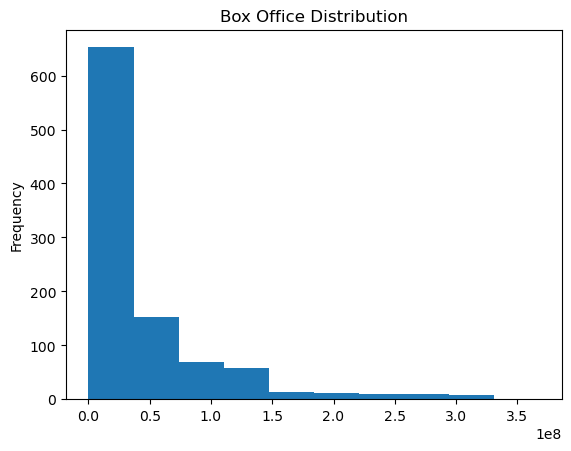

In [48]:
# create a histogram plot to identify data distribution
movie2["box_office"].plot(kind ="hist",title="Box Office Distribution")

Based on our plot we can notice that the data is skewed.Median is preferred if data is numeric and skewed.

In [49]:
#filling the missing values with median by using .fillna() method
movie2["box_office"]= movie2["box_office"].fillna(movie2["box_office"].median())

In [50]:
#Identify mode for the currency column
movie2["currency"].mode()

0    $
Name: currency, dtype: object

In [51]:
#filling the missing values of currency column with mode by using .fillna() method
movie2["currency"] = movie2["currency"].fillna("$")

In [52]:
#filling the missing values of director column with mode by using .fillna() method
movie2["director"] = movie2["director"].fillna(movie2["director"])

In [53]:
# drop some columns contain missing values
movie2 = movie2.drop(columns = ["studio","dvd_date","runtime","writer"],axis = 1)

In [54]:
# drop missing values
movie2 = movie2.dropna()

In [55]:
# changing the column name by using .rename()
movie2 = movie2.rename(columns ={"theater_date": "release_date" })

In [56]:
#checking for missing values
movie2.isna().sum()

genres          0
director        0
release_date    0
currency        0
box_office      0
dtype: int64

In [57]:
# obtain the shape of a DataFrame
movie2.shape

(3524, 5)

#### Join DataFrames movie1 and movie2
Joining the Dataframes Together First, identify the shared key between them. (Shared key meaning, the values we want to join on). The shared key between these two dataframes is (genres) column. We will use merge() method

In [58]:
# Create new data frame by combining movie1 and movie2 using .merge()method
# View the top of the data frame.
genre_df = pd.merge(movie1,movie2,on="genres",how ="left")
genre_df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office
0,Love on a Leash,Documentary,10.0,9.7,25,Sam Irwin,1994-04-01,$,15671532.5
1,Love on a Leash,Documentary,10.0,9.7,25,Stanley Kramer,1965-07-29,$,15671532.5
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0
3,Love on a Leash,Documentary,10.0,9.7,25,Dave Grohl,2013-02-01,$,419361.0
4,Love on a Leash,Documentary,10.0,9.7,25,Leon Gast,2010-07-30,$,2367.0


The merge between the two dataframes is Left Join returns all the records from the left table, as well as the shared records from the right table 

In [59]:
#obtain the shape of a DataFrame
genre_df.shape

(80862, 9)

In [60]:
#Checking for missing values
genre_df.isna().sum()

Title             0
genres            0
runtime           0
rating            0
numvotes          0
director        475
release_date    475
currency        475
box_office      475
dtype: int64

We got small amount of missing values in some columns its better to drop them.

In [61]:
#Drop the missing values using .dropna() method.
genre_df = genre_df.dropna()
genre_df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office
0,Love on a Leash,Documentary,10.0,9.7,25,Sam Irwin,1994-04-01,$,15671532.5
1,Love on a Leash,Documentary,10.0,9.7,25,Stanley Kramer,1965-07-29,$,15671532.5
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0
3,Love on a Leash,Documentary,10.0,9.7,25,Dave Grohl,2013-02-01,$,419361.0
4,Love on a Leash,Documentary,10.0,9.7,25,Leon Gast,2010-07-30,$,2367.0


In [62]:
# obtain the shape of the dataframe
genre_df.shape

(80387, 9)

#### Movie3 Preprocessing


In [63]:
# summary of our data frame df using .info() method
movie3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data types : The columns containing strings are type object, The columns containing whole number are type int64 whereas, The columns containing decimal numbers are type float64.


#### Checking for Duplicate Values

In [64]:
# Checking for duplicate values using .duplicated()
duplicate = movie3[movie3.duplicated()]
duplicate

,title,studio,domestic_gross,foreign_gross,year


There is no duplicated values

In [69]:
# Checking for missing values using .isna()
movie3.isna().sum()

Title                0
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64

We have some missing values we will deal with it.

In [66]:
#remove a column using .drop() method
movie3 = movie3.drop(columns ="year",axis=1)

In [67]:
# changing the column name by using .rename()
movie3 = movie3.rename(columns ={"title":"Title"})

In [68]:
# display the top of the dataframe
movie3.head()

,Title,studio,domestic_gross,foreign_gross
0,Toy Story 3,BV,415000000.0,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
3,Inception,WB,292600000.0,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000


#### Data Imputation
For numeric columns domestic_gross and foreign_gross, filling the missing values with the median or mean value of the same column that has missing numerical values using 'fillna()' based on the column distribution.

<Axes: title={'center': 'Domestic Gross Distribution'}, ylabel='Frequency'>

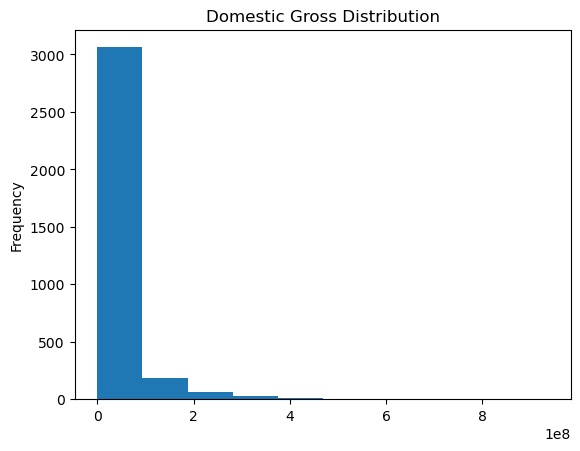

In [70]:
# create a histogram plot to identify data distribution
movie3["domestic_gross"].plot(kind ="hist",title ="Domestic Gross Distribution")

Based on our plot we can notice that the data is skewed.Median is preferred if data is numeric and skewed.

In [72]:
#filling the missing values with median by using .fillna() method
movie3["domestic_gross"] = movie3["domestic_gross"].fillna(movie3["domestic_gross"].median())

In [73]:
# Convert the column type from object to string
movie3 ["foreign_gross"] = movie3 ["foreign_gross"].astype(str)

In [74]:
# Apply the clean_box_office function to the foreign_gross column
movie3 ["foreign_gross"] = movie3["foreign_gross"].apply(clean_box_office)

<Axes: title={'center': 'Distribution of Forgin Gross'}, ylabel='Frequency'>

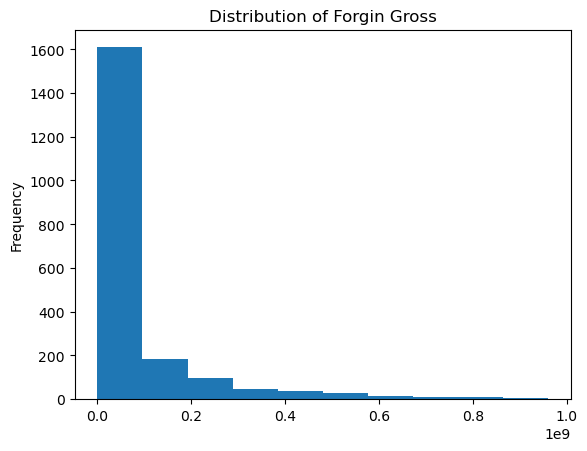

In [75]:
# create a histogram plot to identify data distribution
movie3["foreign_gross"].plot(kind ="hist",title ="Distribution of Forgin Gross")

In [76]:
#filling the missing values with median by using .fillna() method
movie3["foreign_gross"] = movie3["foreign_gross"].fillna(movie3["foreign_gross"].median())

#### Movie4 Preprocessing

In [77]:
# summary of our data frame df using .info() method
movie4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


Based on the summery above all the columns types are object , We have to change some of thier types such as converting the release_date column's type from object to date ,(production,domestic,worldwide)from object to float.

In [78]:
# create a new column to the dataframe
movie4["currency"] = "$"

In [79]:
#  Create a function toremove $ char from columns.
def remove_dollar(val):
    val = val.replace("$","")
    val = val.replace(",","")
    return float(val)

In [80]:
# Convert the column type from object to string
movie4["production_budget"] = movie4["production_budget"].astype(str)

In [81]:
# Apply the remove_dollar function to the production_budget column
movie4["production_budget"] = movie4["production_budget"].apply(remove_dollar)

In [82]:
# Convert the column type from object to string
movie4["domestic_gross"] = movie4["domestic_gross"].astype(str)

In [83]:
# Apply the remove_dollar function to the domestic_gross column
movie4["domestic_gross"] = movie4["domestic_gross"] .apply(remove_dollar)

In [84]:
# Convert the column type from object to string
movie4["worldwide_gross"] = movie4["worldwide_gross"].astype(str)

In [85]:
# Apply the remove_dollar function to the worldwide_gross column
movie4["worldwide_gross"] = movie4["worldwide_gross"].apply(remove_dollar)

In [86]:
# changing the column name by using .rename()
movie4 = movie4.rename(columns = {"movie":"Title"})

In [87]:
# changing the column name by using .rename()
movie4 = movie4.rename(columns = {"worldwide_gross":"foreign_gross"})

In [88]:
# Display the top of the dataframe
movie4.head()

,release_date,Title,production_budget,domestic_gross,foreign_gross,currency
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,$
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,$
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,$
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,$
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,$


#### Checking for Duplicate Values


In [89]:
# Checking for duplicate values using .duplicated()
duplicate = movie4[movie4.duplicated()]
duplicate

,release_date,Title,production_budget,domestic_gross,foreign_gross,currency
id,,,,,,


There is no duplicated values

#### Identifying Missing Values

In [90]:
# Checking for missing values using .isna()
movie4.isna().sum()

release_date         0
Title                0
production_budget    0
domestic_gross       0
foreign_gross        0
currency             0
dtype: int64

In [91]:
#convert the type of release_date colunm date

movie4["release_date"] = pd.to_datetime( movie4["release_date"])

#### Join dataFrames movie3 and movie4
Joining the Dataframes Together First, identify the shared key between them. (Shared key meaning, the values we want to join on). The shared keys between these two dataframes are (Title,domestic_gross,foreign_gross) column. We will use merge() method

In [92]:
# Create new data frame by combining movie3 and movie4 using .merge()method
# View the top of the data frame.
budget_df = pd.merge(movie4,movie3,on=["Title","domestic_gross","foreign_gross"],how = 'left')
budget_df.head()

,release_date,Title,production_budget,domestic_gross,foreign_gross,currency,studio
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,$,NaN
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,$,NaN
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,$,NaN
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,$,NaN
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,$,NaN


The merge between the two dataframes is Left Join returns all the records from the left table, as well as the shared records from the right table .

In [93]:
# create new column 
budget_df["box_office"] = budget_df["foreign_gross"]+budget_df["domestic_gross"]

In [94]:
# Check the data frame shape
budget_df.shape

(5782, 8)

#### Identifying and Handling Missing Values

In [95]:
# Check for missing values
budget_df.isna().sum()

release_date            0
Title                   0
production_budget       0
domestic_gross          0
foreign_gross           0
currency                0
studio               5782
box_office              0
dtype: int64

We have large numbers of missing values on the stiudio column, We will drop this column.

In [96]:
#Drop columns
budget_df = budget_df.drop(columns = ["studio","foreign_gross","domestic_gross"],axis=1)


In [97]:
#Display the top of dataframe
budget_df.head()

,release_date,Title,production_budget,currency,box_office
0,2009-12-18,Avatar,425000000.0,$,3.536853e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,$,1.286728e+09
2,2019-06-07,Dark Phoenix,350000000.0,$,1.925247e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,$,1.862020e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,$,1.936903e+09


#### Movie5 Preprocessing

In [98]:
# summary of our data frame df using .info() method
movie5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


We notice that the date column type is object and it contains dates , we should change its type to date type

In [99]:
# Drop the irreletive columns using .drop() method.
movie5 = movie5.drop(columns =["id","rating","fresh","top_critic"],axis =1)

In [100]:
# Change the column name using .rename()method.
movie5 = movie5.rename(columns = {"date":"release_date"})

In [101]:
#Change the column type to date type
movie5["release_date"] = pd.to_datetime(movie5["release_date"])

In [102]:
# Display the top of the dataframe.
movie5.head()

,review,critic,publisher,release_date
0,A distinctly gallows take on contemporary fina...,PJ Nabarro,Patrick Nabarro,2018-11-10
1,It's an allegory in search of a meaning that n...,Annalee Newitz,io9.com,2018-05-23
2,... life lived in a bubble in financial dealin...,Sean Axmaker,Stream on Demand,2018-01-04
3,Continuing along a line introduced in last yea...,Daniel Kasman,MUBI,2017-11-16
4,... a perverse twist on neorealism...,NaN,Cinema Scope,2017-10-12


In [103]:
# check for the dataframe shape
movie5.shape

(54432, 4)

#### Checking for Duplicate Values

In [104]:
# Checking for duplicate values using .duplicated()
duplicates = movie5[movie5.duplicated()]
duplicates

,review,critic,publisher,release_date
316,NaN,Steve Rhodes,Internet Reviews,2000-01-01
722,NaN,James Berardinelli,ReelViews,2000-01-01
724,NaN,Madeleine Williams,Cinematter,2000-01-01
725,NaN,Scott Renshaw,rec.arts.movies.reviews,2000-01-01
965,NaN,Roger Ebert,Chicago Sun-Times,2000-01-01
...,...,...,...,...
54392,NaN,Audrey Rock-Richardson,Tooele Transcript-Bulletin (Utah),2002-08-22
54393,NaN,Scott Weinberg,eFilmCritic.com,2002-07-25
54428,NaN,Michael Szymanski,Zap2it.com,2005-09-21
54429,NaN,Emanuel Levy,EmanuelLevy.Com,2005-07-17


In [105]:
# drop the duplicated values using .drop_duplicates() method
movie5 = movie5.drop_duplicates(keep = "first")

#### Identifying and Handling Missing Values

In [106]:
# Check for missing values
movie5.isna().sum()

review          2393
critic          2296
publisher        308
release_date       0
dtype: int64

In [107]:
# Drop the missing values
# Display the top of the data frame
movie5 = movie5.dropna()
movie5.head()

,review,critic,publisher,release_date
0,A distinctly gallows take on contemporary fina...,PJ Nabarro,Patrick Nabarro,2018-11-10
1,It's an allegory in search of a meaning that n...,Annalee Newitz,io9.com,2018-05-23
2,... life lived in a bubble in financial dealin...,Sean Axmaker,Stream on Demand,2018-01-04
3,Continuing along a line introduced in last yea...,Daniel Kasman,MUBI,2017-11-16
5,... Cronenberg's Cosmopolis expresses somethin...,Michelle Orange,Capital New York,2017-09-11


#### Movie6 Preprocessing

In [108]:
# summary of our data frame df using .info() method
movie6.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [109]:
# Drop the irreletive columns using .drop() method.
# Display the top of the dataframe
movie6 = movie6.drop(columns =["id","Unnamed: 0","genre_ids","popularity","original_title"],axis =1)
movie6.head()

,original_language,release_date,title,vote_average,vote_count
0,en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,2010-05-07,Iron Man 2,6.8,12368
3,en,1995-11-22,Toy Story,7.9,10174
4,en,2010-07-16,Inception,8.3,22186


In [110]:
# Change columns names
movie6 = movie6.rename(columns={"title":"Title","vote_average":"rating","vote_count":"numvotes"})

In [111]:
#Change the column type to date type
movie6["release_date"] = pd.to_datetime(movie6["release_date"])

#### Checking for Duplicate Values

In [112]:
# Checking for duplicate values using .duplicated()
duplicates = movie6[movie6.duplicated()]
duplicates

,original_language,release_date,Title,rating,numvotes
2473,en,1995-11-22,Toy Story,7.9,10174
2477,en,1999-11-24,Toy Story 2,7.5,7553
2536,en,2010-12-10,TRON: Legacy,6.3,4387
2673,en,2010-12-29,Blue Valentine,6.9,1677
2717,en,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...
26481,en,2013-03-18,Summer League,4.0,3
26485,en,2013-05-15,Devils in the Darkness,3.5,1
26504,en,2015-03-28,Head,1.0,1
26510,en,2018-10-19,Fail State,0.0,1


In [113]:
# Remove the duplicated values
movie6 = movie6.drop_duplicates(keep = "first")

In [114]:
#check the data frame shape
movie6.shape

(25496, 5)

#### Identifying the Missing Values

In [115]:
# checking for missing values
movie6.isna().sum()

original_language    0
release_date         0
Title                0
rating               0
numvotes             0
dtype: int64

In [116]:
# Display the top of data frame
movie6.head()

,original_language,release_date,Title,rating,numvotes
0,en,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,2010-05-07,Iron Man 2,6.8,12368
3,en,1995-11-22,Toy Story,7.9,10174
4,en,2010-07-16,Inception,8.3,22186


In [117]:
# check for the data frame shape
movie6.shape

(25496, 5)

#### Joining the DataFrames
Joining the Dataframes(genre,budget) Together , We will use merge() method

In [118]:
# Create new data frame by combining genre_df and budget_df using .merge()method
# View the top of the data frame.
genre_budget_df = pd.merge(genre_df,budget_df,how ="left")
genre_budget_df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,production_budget
0,Love on a Leash,Documentary,10.0,9.7,25,Sam Irwin,1994-04-01,$,15671532.5,NaN
1,Love on a Leash,Documentary,10.0,9.7,25,Stanley Kramer,1965-07-29,$,15671532.5,NaN
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,NaN
3,Love on a Leash,Documentary,10.0,9.7,25,Dave Grohl,2013-02-01,$,419361.0,NaN
4,Love on a Leash,Documentary,10.0,9.7,25,Leon Gast,2010-07-30,$,2367.0,NaN


In [119]:
# check for the dataframe shape
genre_budget_df.shape

(80387, 10)

#### Identifying the Missing Values

In [120]:
# check for missing values
genre_budget_df.isna().sum()

Title                    0
genres                   0
runtime                  0
rating                   0
numvotes                 0
director                 0
release_date             0
currency                 0
box_office               0
production_budget    80387
dtype: int64

We have a huge number of misssing values on the production budget column .It is better to drop the whole column from our dataset.

In [121]:
# drop some columns 
genre_budget_df = genre_budget_df.drop(columns=["production_budget"],axis =1)


In [122]:
#Check for missing values after update
genre_budget_df.isna().sum()


Title           0
genres          0
runtime         0
rating          0
numvotes        0
director        0
release_date    0
currency        0
box_office      0
dtype: int64

In [123]:
# check for the data frame shape
genre_budget_df.shape

(80387, 9)

In [124]:
# display the top of  the data frame 
genre_budget_df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office
0,Love on a Leash,Documentary,10.0,9.7,25,Sam Irwin,1994-04-01,$,15671532.5
1,Love on a Leash,Documentary,10.0,9.7,25,Stanley Kramer,1965-07-29,$,15671532.5
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0
3,Love on a Leash,Documentary,10.0,9.7,25,Dave Grohl,2013-02-01,$,419361.0
4,Love on a Leash,Documentary,10.0,9.7,25,Leon Gast,2010-07-30,$,2367.0


In [125]:
# summary of our data frame df using .info() method
genre_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80387 entries, 0 to 80386
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         80387 non-null  object        
 1   genres        80387 non-null  object        
 2   runtime       80387 non-null  float64       
 3   rating        80387 non-null  float64       
 4   numvotes      80387 non-null  int64         
 5   director      80387 non-null  object        
 6   release_date  80387 non-null  datetime64[ns]
 7   currency      80387 non-null  object        
 8   box_office    80387 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.1+ MB


In [126]:
# check the count of each genre
genre_budget_df["genres"].value_counts().sort_values()

Western          496
Animation       1312
Horror          1485
Documentary     4879
Romance         5016
Comedy         19968
Drama          47231
Name: genres, dtype: int64

#### Joining the DataFrames
Joining the Dataframes(genre_budget and movie5) Together First, identify the shared key between them. (Shared key meaning, the values we want to join on). The shared keys between these two dataframes are (release_date) column. We will use merge() method

In [127]:
# Create new data frame by combining genre_budget_df and movie5 using .merge()method
# View the top of the data frame.
df= pd.merge(genre_budget_df,movie5,on =["release_date"],how ="left")
df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,review,critic,publisher
0,Love on a Leash,Documentary,10.0,9.7,25,Sam Irwin,1994-04-01,$,15671532.5,NaN,NaN,NaN
1,Love on a Leash,Documentary,10.0,9.7,25,Stanley Kramer,1965-07-29,$,15671532.5,NaN,NaN,NaN
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,James Brown and B.B. King anchor this footnote...,Robert Davis,Paste Magazine
3,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte pads out the conce...,Peter Rainer,Christian Science Monitor
4,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,A vibrant and joyous new documentary.,Kenneth Turan,Los Angeles Times


In [128]:
#check for the data frame shape
df.shape

(1283846, 12)

#### Identifying and Handiling the Missing Values

In [129]:
# checking for missing values using .isna() function.
df.isna().sum()

Title               0
genres              0
runtime             0
rating              0
numvotes            0
director            0
release_date        0
currency            0
box_office          0
review          47817
critic          47817
publisher       47817
dtype: int64

In [130]:
# drop missing values
df= df.dropna()
df.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,review,critic,publisher
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,James Brown and B.B. King anchor this footnote...,Robert Davis,Paste Magazine
3,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte pads out the conce...,Peter Rainer,Christian Science Monitor
4,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,A vibrant and joyous new documentary.,Kenneth Turan,Los Angeles Times
5,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte does a terrific jo...,Elizabeth Weitzman,New York Daily News
6,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,The behind the scenes record of the event is f...,Pam Grady,Boxoffice Magazine


#### Joining the DataFrames
Joining the Dataframes(df and movie6) Together First, identify the shared key between them. (Shared key meaning, the values we want to join on). The shared keys between these two dataframes are (Title,release_date,rating,numvotes) column. We will use merge() method

In [131]:
# create the final data frame
final=pd.merge(df,movie6,on =["Title","release_date","rating","numvotes"],how ="left")
final.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,review,critic,publisher,original_language
0,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,James Brown and B.B. King anchor this footnote...,Robert Davis,Paste Magazine,NaN
1,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte pads out the conce...,Peter Rainer,Christian Science Monitor,NaN
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,A vibrant and joyous new documentary.,Kenneth Turan,Los Angeles Times,NaN
3,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte does a terrific jo...,Elizabeth Weitzman,New York Daily News,NaN
4,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,The behind the scenes record of the event is f...,Pam Grady,Boxoffice Magazine,NaN


In [132]:
# check dataframe shape
final.shape

(1236029, 13)

In [90]:
# calculate some basic statistical 
budget_df.describe()

,production_budget,domestic_gross,foreign_gross,total_gross
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08
std,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08
max,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09


#### Identifying and Handiling the Missing Values

In [133]:
# check for missing values
final.isna().sum()

Title                      0
genres                     0
runtime                    0
rating                     0
numvotes                   0
director                   0
release_date               0
currency                   0
box_office                 0
review                     0
critic                     0
publisher                  0
original_language    1236029
dtype: int64

The column of original_language has 1236029 we will drop the whole column.

In [134]:
# drop column
final = final.drop(columns="original_language",axis=1)


In [135]:
# display the top of the final dataframe
final.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,review,critic,publisher
0,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,James Brown and B.B. King anchor this footnote...,Robert Davis,Paste Magazine
1,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte pads out the conce...,Peter Rainer,Christian Science Monitor
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,A vibrant and joyous new documentary.,Kenneth Turan,Los Angeles Times
3,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte does a terrific jo...,Elizabeth Weitzman,New York Daily News
4,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,The behind the scenes record of the event is f...,Pam Grady,Boxoffice Magazine


In [136]:
# check the final data frame shape
final.shape

(1236029, 12)

After preprocessing and joining our dataframe,I think the final data frame is ready now to answer our questions that we set before.

To clarify the relationship between the movie genre and the boxoffice revenue .we will create a new data frame grouped by the (genres) colunm and calculate its mean

In [137]:
# create a new data frame grouped by the (genres) colunm and calculate its mean
genre_box_office = final.groupby("genres").mean()
genre_box_office = genre_box_office.sort_values(by = "box_office",ascending = [False])
genre_box_office

C:\Users\mays8\AppData\Local\Temp\ipykernel_4104\4234391521.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genre_box_office = final.groupby("genres").mean()


,runtime,rating,numvotes,box_office
genres,,,,
Romance,100.515152,7.712121,7489.393939,5.410997e+07
Comedy,87.895833,7.822917,22097.083333,4.247797e+07
Animation,85.585366,7.539024,6633.804878,3.740536e+07
Horror,91.200000,7.520000,102.333333,3.054741e+07
Drama,101.260274,7.569863,59109.369863,2.426281e+07
Western,91.312500,7.637500,18660.875000,1.960255e+07
Documentary,80.890756,7.861345,2056.613445,1.492925e+07


We found that Romance genre gains highest profits ,on the other hand , Documentary genre gets the lowest profits.

### Data visualization

A quick introduction to Matplotlib and seaborn libraries.

Matpalotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Most of the Matplotlib utilities lies under the pyplot submodule usually imported under the plt alias.

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

#### Plotting with categorical data
In seaborn, there are several different ways to visualize a relationship involving categorical data.We would use Bar plot.

#### Bar plots
In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category.(https://seaborn.pydata.org/tutorial/categorical.html)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60')])

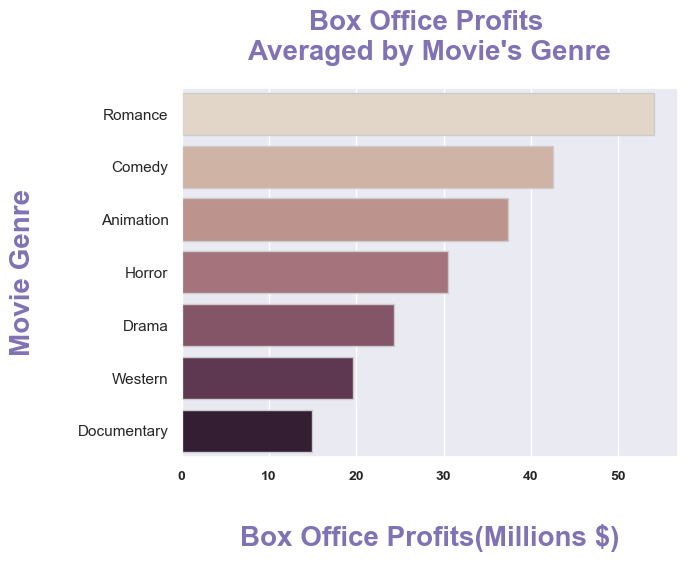

In [138]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create a Categorical Plot (bar) kind.
# Passing data and assigning x and y 

sns.barplot(y = genre_box_office.index, 
                x = genre_box_office ['box_office']/1000000, 
                data= genre_box_office ,
                palette="ch:.25",
                edgecolor=".8"); 



# Set title with matplotlib
plt.title("Box Office Profits \nAveraged by Movie's Genre" ,color='m',pad =20,fontweight='bold',fontsize=20)
# Add x-axis label 
plt.xlabel("Box Office Profits(Millions $)",color='m',labelpad=30,fontweight='bold',fontsize=20)
# Add y-axis label
plt.ylabel("Movie Genre",color='m',labelpad=30,fontweight='bold',fontsize=20)
# customize labelsi
plt.xticks(fontweight='bold',fontsize=10)


Based on the information we got from grouping the final data frame, the highest box office profits we got for the Romance genre.However, the lowest box office profits went to the Documentary genre.

To clarify the relationship between the boxoffice revenue and the movie's director name we will group our dataframe by directors, and display the top five rows of the dataframe.

In [139]:
#### calculate some basic statistical 
director_box_office = final.groupby("director").mean()
director_box_office = director_box_office.sort_values(by = "box_office",ascending = [False]).head()
director_box_office

C:\Users\mays8\AppData\Local\Temp\ipykernel_4104\3478080487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director_box_office = final.groupby("director").mean()


,runtime,rating,numvotes,box_office
director,,,,
Mel Gibson,101.260274,7.569863,59109.369863,368000000.0
Jay Roach,87.895833,7.822917,22097.083333,279167575.0
Joel Zwick,93.037037,7.777778,16145.802469,241250669.0
Peter Berg,95.958678,7.670248,44426.809917,227946274.0
Justin Lin,101.260274,7.569863,59109.369863,209805005.0


We can notice here that movies signed by Mel Gibson's name gain the highest profits at the box office.

#### Data visualization

Let's also plot out our data to clarify the avarage of box office profits based on the director's name using "bar" kind from Categorical plot.

Plotting with categorical data In seaborn, there are several different ways to visualize a relationship involving categorical data.We would use Bar plot.

Bar plots In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category.(https://seaborn.pydata.org/tutorial/categorical.html)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mel Gibson'),
  Text(1, 0, 'Jay Roach'),
  Text(2, 0, 'Joel Zwick'),
  Text(3, 0, 'Peter Berg'),
  Text(4, 0, 'Justin Lin')])

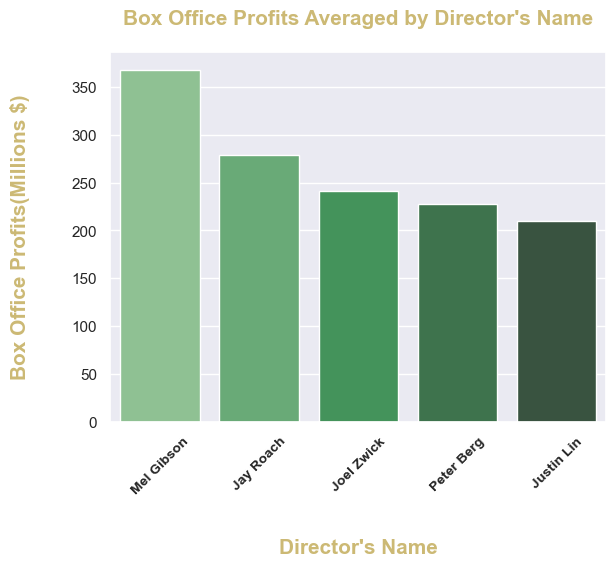

In [140]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create a Categorical Plot (bar) kind.
# Passing data and assigning x and y 

sns.barplot(data = director_box_office, x = director_box_office.index, y = director_box_office["box_office"]/1000000,
             palette="Greens_d")


# Set title with matplotlib
plt.title("Box Office Profits Averaged by Director's Name" ,color='y',pad =20,fontweight='bold',fontsize=15)
# Add x-axis label 
plt.xlabel("Director's Name",color='y',labelpad=30,fontweight='bold',fontsize=15)
# Add y-axis label
plt.ylabel("Box Office Profits(Millions $)",color='y',labelpad=30,fontweight='bold',fontsize=15)
# customize labelsi
plt.xticks(fontweight='bold',fontsize=10,rotation=45)


Notice that Mel Gibson's name gained the highest box office profits.

To clarify the relationship between the movie's released month and the boxoffice revenue, we will extract the released month, then group the dataframe by the "month" column by using the.groupby() method. We have to add an aggregation function (likemean) to the group. This allows us to compute summary statistics! We would use.sort_values to view the data frame organized based on box_office profits.

In [141]:
# Extract Month from "release_date" column
# convert the month formate from number to name 

final['month'] = pd.to_datetime(final['release_date']).dt.month_name()

final.head()

,Title,genres,runtime,rating,numvotes,director,release_date,currency,box_office,review,critic,publisher,month
0,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,James Brown and B.B. King anchor this footnote...,Robert Davis,Paste Magazine,July
1,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte pads out the conce...,Peter Rainer,Christian Science Monitor,July
2,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,A vibrant and joyous new documentary.,Kenneth Turan,Los Angeles Times,July
3,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,Director Jeffrey Levy-Hinte does a terrific jo...,Elizabeth Weitzman,New York Daily News,July
4,Love on a Leash,Documentary,10.0,9.7,25,Jeffrey Levy-Hinte,2009-07-10,$,200000.0,The behind the scenes record of the event is f...,Pam Grady,Boxoffice Magazine,July


In [142]:
# create a new data frame grouped by months names and calculate the mean values 
# display the new dataframe 

month_df = final.groupby("month").mean()
month_df = month_df.sort_values(by = "box_office",ascending = [False])
month_df


C:\Users\mays8\AppData\Local\Temp\ipykernel_4104\483498838.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_df = final.groupby("month").mean()


,runtime,rating,numvotes,box_office
month,,,,
February,95.456696,7.660764,35000.165891,6.550281e+07
June,96.943664,7.657047,38162.537250,4.826348e+07
July,93.882406,7.692994,36007.990965,4.560308e+07
December,97.491558,7.644625,45978.128733,4.549007e+07
October,95.068660,7.655686,39227.184936,3.666594e+07
April,94.067104,7.689839,34785.196178,3.098256e+07
September,97.214245,7.646267,46022.839663,3.015639e+07
March,96.248117,7.651940,41813.349240,2.974523e+07
November,95.746254,7.651290,38491.910297,2.512629e+07


We noticed that the highest box office profits were recorded in February,during Valantine  season.



#### Data visualization
Let's also plot out our data to clarify the avarage of box office profits per every month using "bar" kind from Categorical plot.

Plotting with categorical data
In seaborn, there are several different ways to visualize a relationship involving categorical data.We would use Bar plot.

Bar plots In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category.(https://seaborn.pydata.org/tutorial/categorical.html)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'February'),
  Text(0, 1, 'June'),
  Text(0, 2, 'July'),
  Text(0, 3, 'December'),
  Text(0, 4, 'October'),
  Text(0, 5, 'April'),
  Text(0, 6, 'September'),
  Text(0, 7, 'March'),
  Text(0, 8, 'November'),
  Text(0, 9, 'August'),
  Text(0, 10, 'May'),
  Text(0, 11, 'January')])

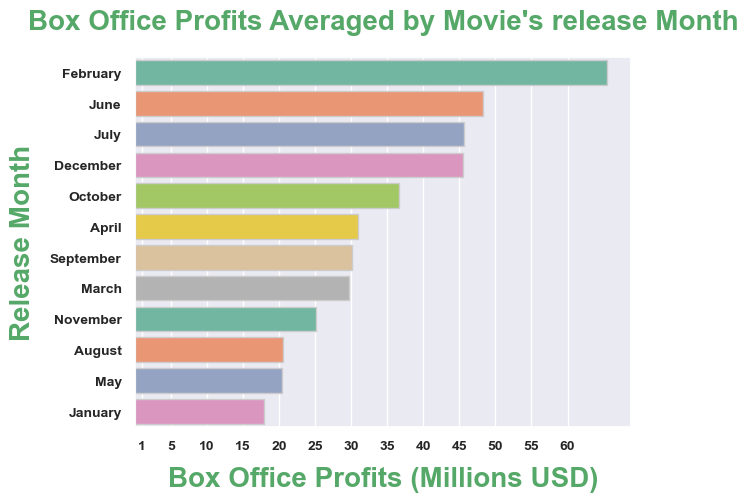

In [143]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# create a Categorical Plot 
# Passing data and assigning x and y 

sns.barplot(x = month_df['box_office']/1000000, 
                y = month_df.index, 
                data= month_df ,
                palette="Set2" ,
                edgecolor=".8"); 

# Set title with matplotlib
plt.title("Box Office Profits Averaged by Movie's release Month",color='g',pad=20,fontweight='bold',fontsize=20)
# Add x-axis label
plt.xlabel("Box Office Profits (Millions USD)",color='g',labelpad=10,fontweight='bold',fontsize=20)
# Add y-axis label
plt.ylabel("Release Month",color='g',labelpad=10,fontweight='bold',fontsize=20)
# customize labels
plt.xticks([1,5,10,15,20,25,30,35,40,45,50,55,60],fontweight='bold',fontsize=10)
plt.yticks(fontweight='bold',fontsize=10)


We notice that,The highest value of box office profits had achieved in February during Winter seasons

## Results

According to the data that we analized above, We found some factors directly affect movie's profits on Box Office:



#### First : Movies Genre 
As we can show from the figure below , box office profits increase in some movie genres.

The box office profits were recorded (Romance,Comedy,Animation,Horror,Drama).However, the highest number of produced movies falls under Drama Genre.

![genre.png](images/genre.png)

#### Second : Director's Name
When we take a look at the figure below , we can notify the postive corelation between the movie's Directos name and the movie's boxoffice profits.

![director.png](images/director.png)

#### Third : Released date
When we take a look at the figure below , we can show the clear relationship between the box office profits based on the month that the movie was released in.The highest profits were reported in February during Valentin's season

![month.png](images/month.png)

## Conclusion
This analysis leads to three recommendations for helping Microsoft to understand the factors that are affecting their profits.

1.More accurate forecasting of the movie genres most likely to bring in more money Which movie genre receives the highest box office profits

2.Director is an especially important role in the success of a film. director’s reputation can often influence whether the audience go and see a film, or even buy it because they have trust in the director’s style and reputation.

3.More accurate estimation of the film's cinema release time. This model might make use of information that is currently accessible, such as monthly averages for box office revenues.

## Recommendations
Based on the results , our recommendations would be in three areas:

1.Movie's Genre: Microsoft should pay more attention to the movie genre, which gains more profits at the box office? As we found the movies in the Romance genre achieved the highest box office revenues.

2.Director's Name: Microsoft should deal with a famous director who has developed a brilliant reputation over the years and has a broad audience trust, As we found, Mel Gibson gained the highest box office revenues.

3.Movie's released month: Microsoft should release their movie in February during valantine season,when the box office gains highest profits at that time.

